# Day 2 - Girls in Data Science

In [1]:
# Load libraries
library(ggplot2)
library(tidyverse)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




## Day 2 Learning Objectives

- Compare different measures of central tendency and spread
- Identify various types of sampling bias
- Understand the difference between observation studies and experiments
- Investigate the idea of sampling and the relationship between sample size and variability

# 1. Measures of Central Tendency and Variability

3 ways to describe the distribution of a quantitative variable:

- Shape
- Center
- Spread

We can assess the distribution of data by looking at graphs as well as by numerical calculations (descriptive statistics).

## 1.1 Shape

To assess the shape of a distribution, we can consider the **modality** (number of peaks), **symmetry** (symmetric
vs. skewed) and **outliers**.

### Modality

In [71]:
set.seed(930) # Setting the seed allows us to get reproducible results

# Generate data
data_tibble <- tibble(var1=rnorm(1500,0,1),var2=c(rnorm(750,-5,2), rnorm(750,5,2)),
                      var3=c(rnorm(500,-5,2), rnorm(500,5,2),rnorm(500,15,2)),var4=runif(1500,0,10))
variable_names <- c("Unimodal Distribution", "Bimodal Distribution", "Multimodal Distribution", "Uniform Distribution")

data_tibble <- data_tibble |>
  rename(setNames(names(data_tibble), variable_names))

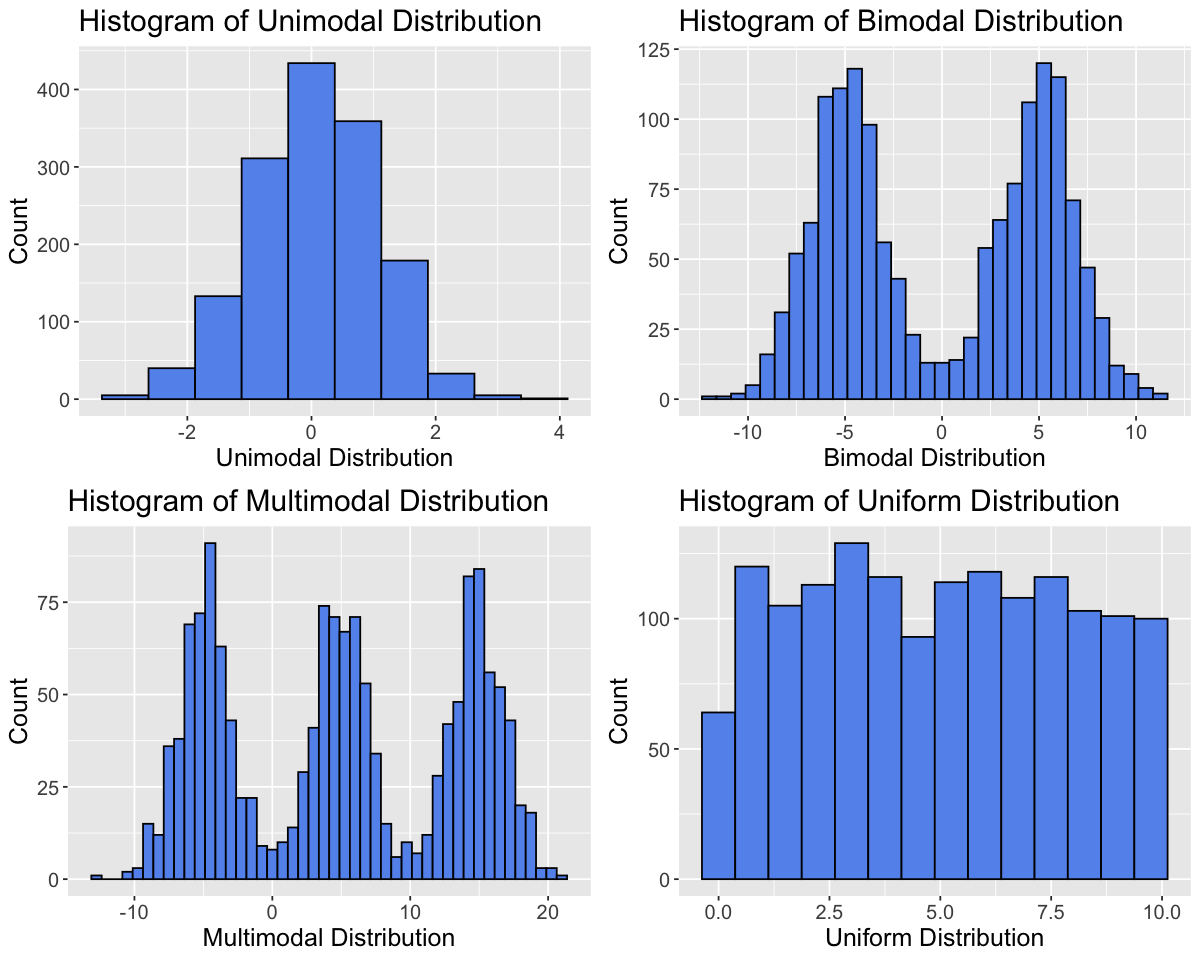

In [74]:
options(repr.plot.width = 10, repr.plot.height = 8)

# Create histograms for each variable
plots <- lapply(variable_names, function(var_name) {
  ggplot(data_tibble, aes(x = .data[[var_name]])) +
    geom_histogram(binwidth = 0.75, fill = "cornflowerblue", color = "black") +
    labs(title = paste("Histogram of", var_name), x = var_name, y = "Count") +
    theme(text = element_text(size = 15))
})

# Arrange plots in a grid
plot_grid(plotlist = plots, ncol = 2)

### Symmetry

Distributions can be symmetric or skewed (left-skewed or right-skewed).

In [81]:
set.seed(930) # Setting the seed allows us to get reproducible results

# Generate data
data_tibble <- tibble(var1=rnorm(1000,0,1),var2=rexp(1000,2),var3=-rexp(1000,2))
variable_names <- c("Symmetric Distribution", "Right-skewed Distribution", "Left-skewed Distribution")

data_tibble <- data_tibble |>
  rename(setNames(names(data_tibble), variable_names))

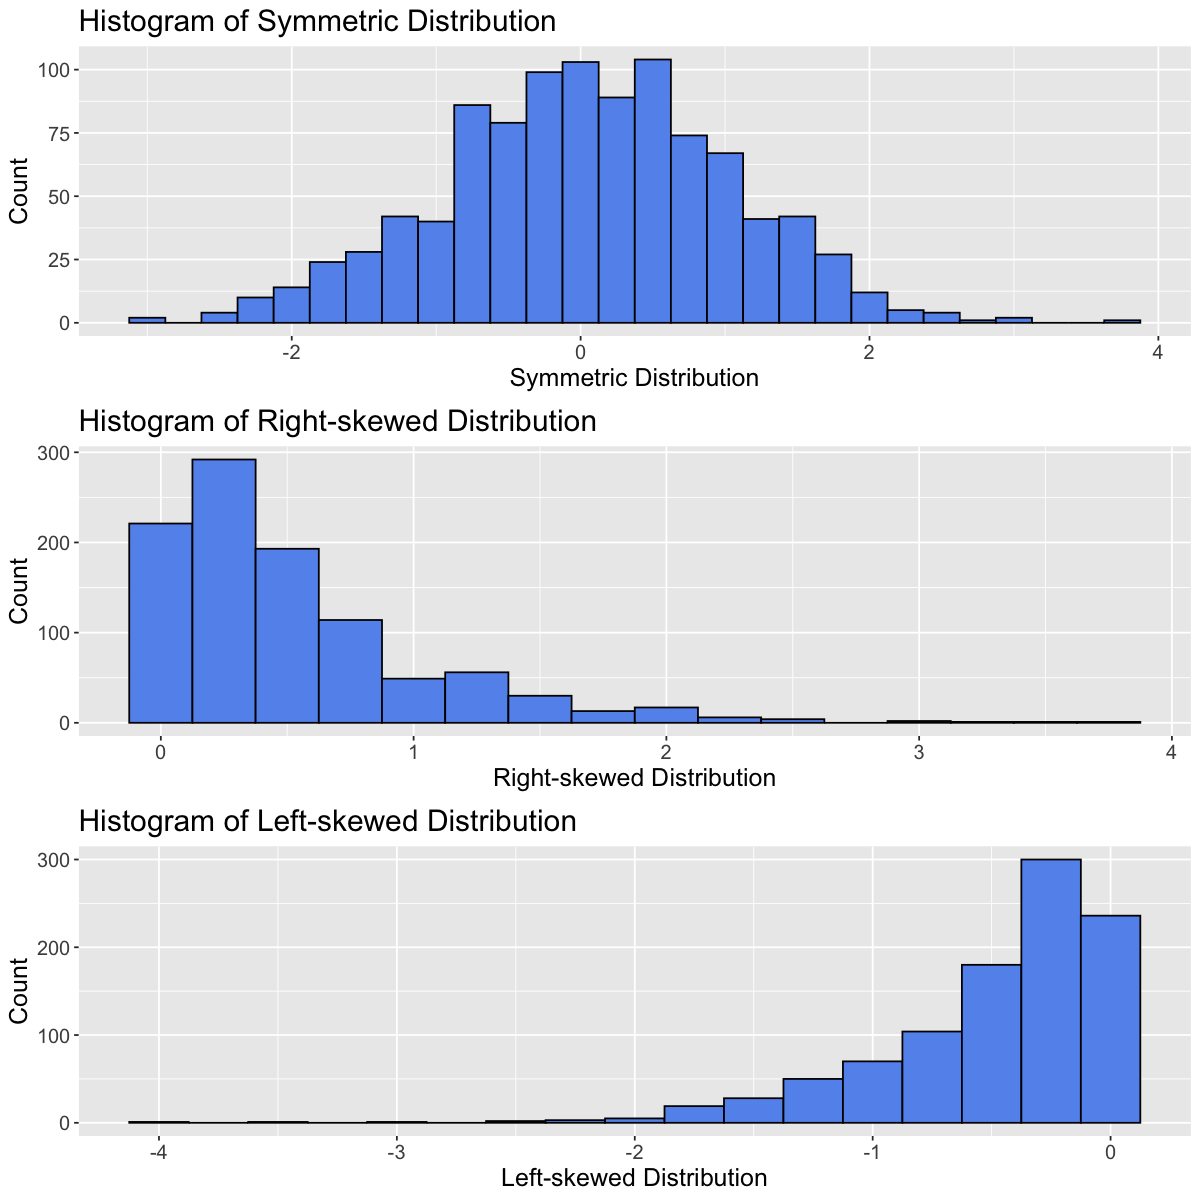

In [82]:
options(repr.plot.width = 10, repr.plot.height = 10)

# Create histograms for each variable
plots <- lapply(variable_names, function(var_name) {
  ggplot(data_tibble, aes(x = .data[[var_name]])) +
    geom_histogram(binwidth = 0.25, fill = "cornflowerblue", color = "black") +
    labs(title = paste("Histogram of", var_name), x = var_name, y = "Count") +
    theme(text = element_text(size = 15))
})

# Arrange plots in a grid
plot_grid(plotlist = plots, ncol = 1)

### Outliers

Outliers can seriously influence a variable’s distribution. An outlier is an observation that lies away from the
other data points. Recall our scatterplot of Followers vs. Posts for the Instagram data set:

In [84]:
# Load in/wrangle data

insta <- read_csv('data/insta.csv')
insta <- insta |> select(-'Avg. Likes')
insta <- suppressWarnings(insta |>
              mutate(Followers = as.numeric(str_replace(Followers, "M", ""))*1e6) |> 
              rename(Channel = channel_Info, eng_rate = 'Eng Rate') |> 
             mutate(
                    Posts = case_when(
                      str_detect(Posts , "K") ~ as.numeric(str_replace(Posts , "K", "")) * 1000,
                      str_detect(Posts, "M") ~ as.numeric(str_replace(Posts, "M", "")) * 1000000,
                      TRUE ~ as.numeric(Posts)  # If no suffix, just convert to numeric
                    )
                  ) |>               
             mutate(eng_rate = as.numeric(str_replace(eng_rate, "%", ""))) |> 
             mutate(Category = if_else(is.na(Category), "Not Available", Category))|> 
             mutate(Channel = if_else(is.na(Channel), "Not Available", Channel)))

Rows: 200 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): name, channel_Info, Category, Posts, Followers, Avg. Likes, Eng Rate
dbl (1): rank

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


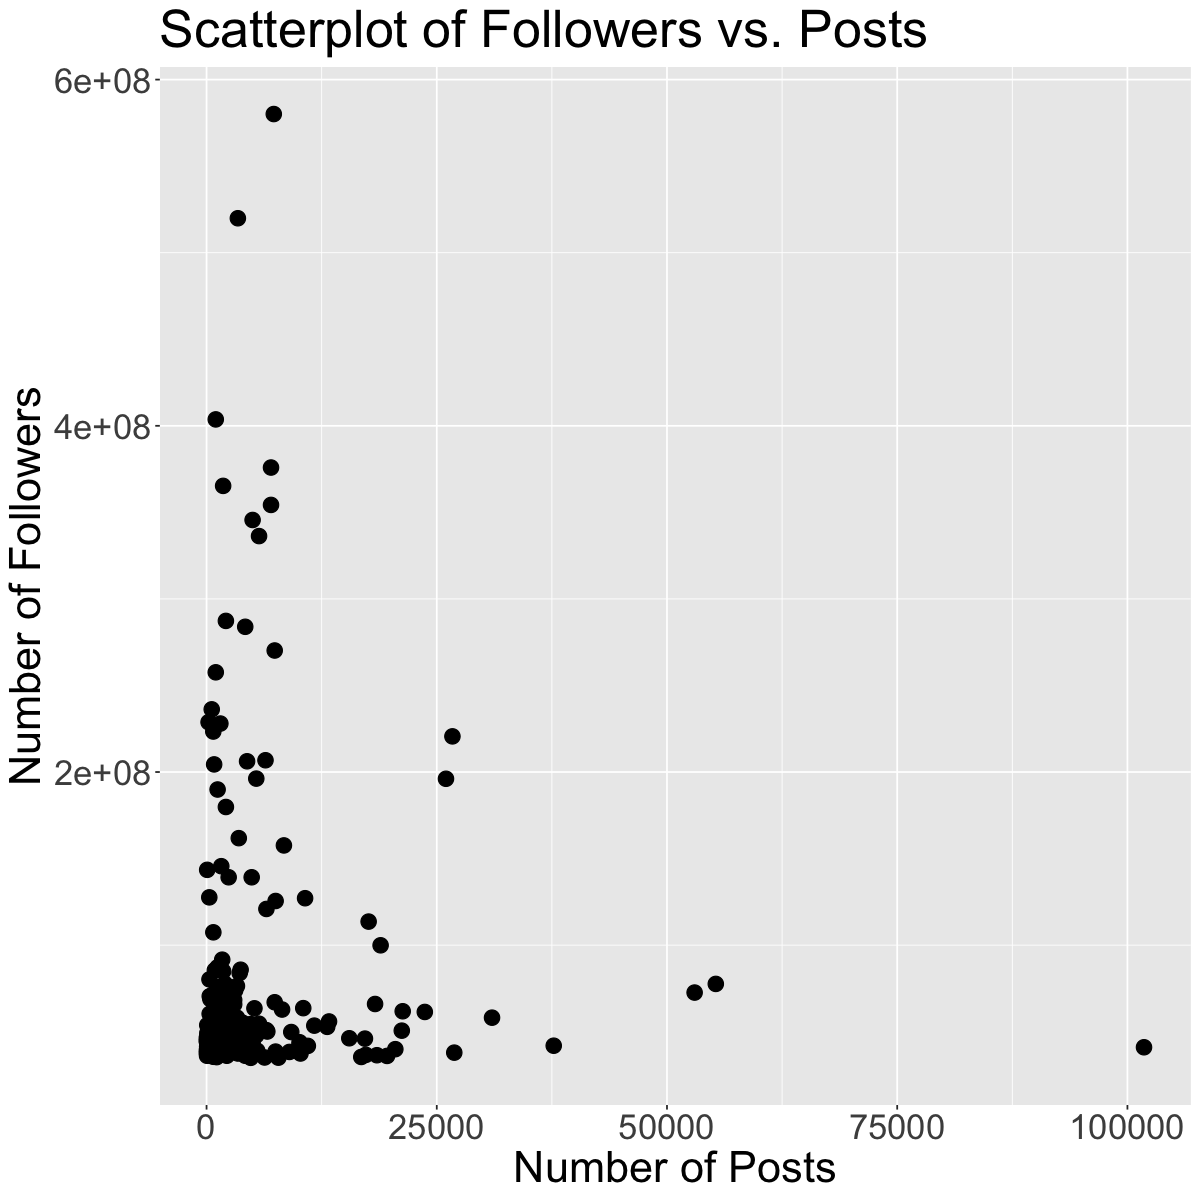

In [92]:
ggplot(insta, aes(x = Posts, y = Followers)) + 
    geom_point(size=4) +
    theme(text = element_text(size = 26)) +
    labs(x='Number of Posts', y='Number of Followers', color='Channel Info', title='Scatterplot of Followers vs. Posts') # rename axes and add title

In [114]:
insta$name[which.max(insta$Posts)]

[1] "worldstar"

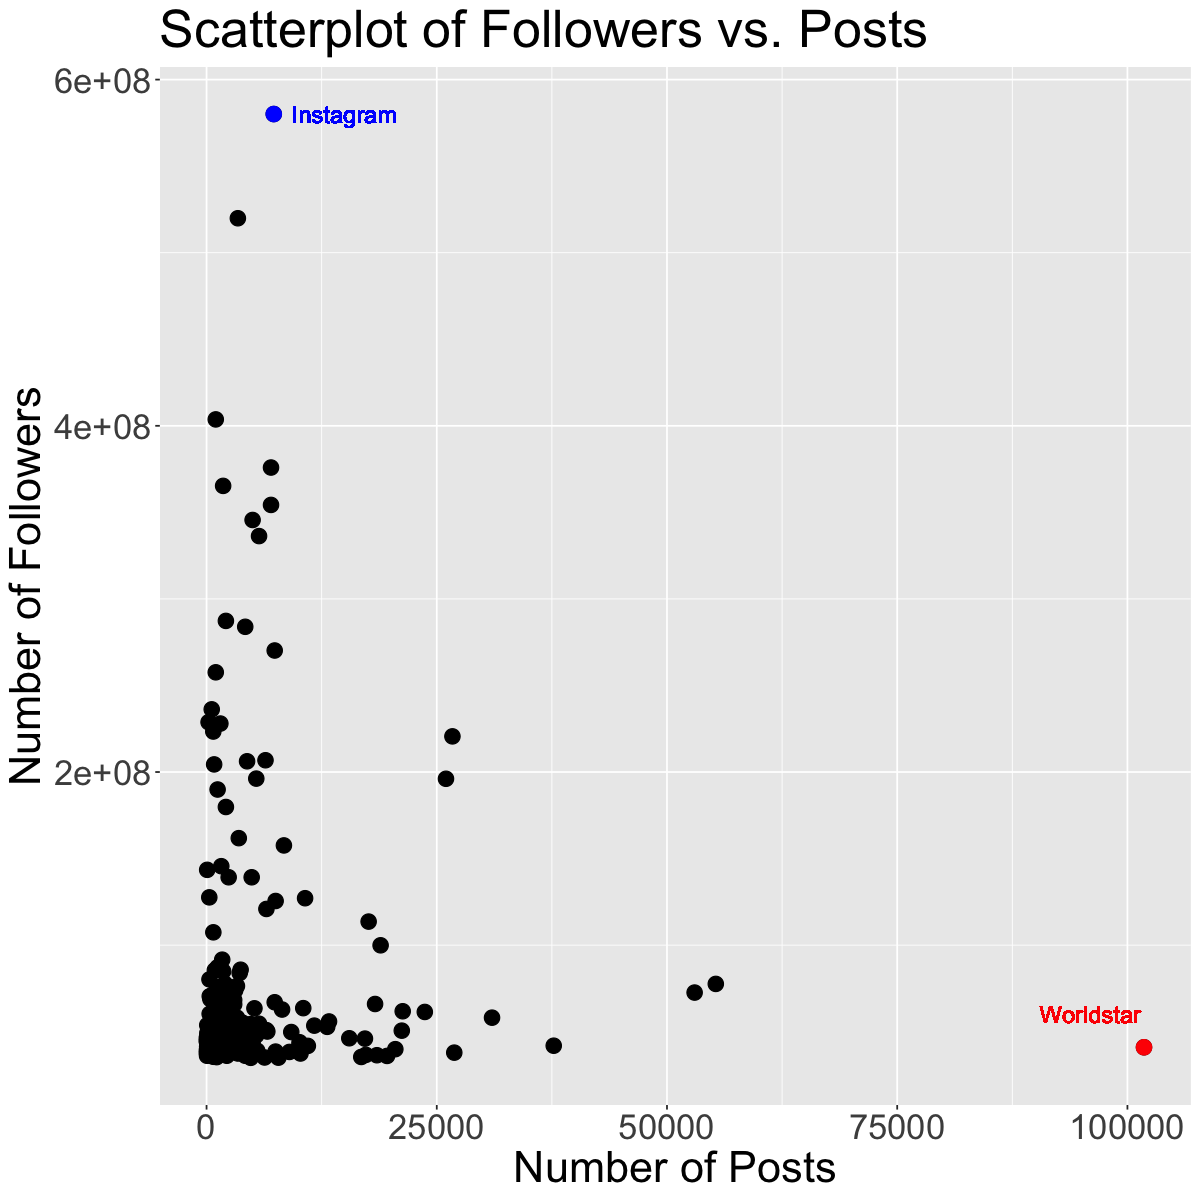

In [117]:
g1 <- subset(insta, name == "worldstar")
g2 <- subset(insta, name == "instagram")

ggplot(insta, aes(x = Posts, y = Followers)) + 
    geom_point(size=4) +
    geom_point(data=g1, size=4, color="red") +
    geom_point(data=g2, size=4, color="blue") +
    theme(text = element_text(size = 26)) +
    geom_text(x = 96000, y = 60000000, label = "Worldstar", color = "red", size = 5) +
    geom_text(x = 15000, y = 580000000, label = "Instagram", color = "blue", size = 5) +
    labs(x='Number of Posts', y='Number of Followers', color='Channel Info', title='Scatterplot of Followers vs. Posts') # rename axes and add title

The red and blue points may be potential outliers. The red point represents the account with the highest number of posts (101800). Although this account has the highest number of posts, they do not have that many followers. Also, the blue point represents the account with the highest number of followers (Instagram), which doesn't have that many posts, but has the most followers.


### Exercise

Going back to the histogram we made of "Posts", comment on its shape. Be sure to reference the modality, symmetry and outliers (if any).

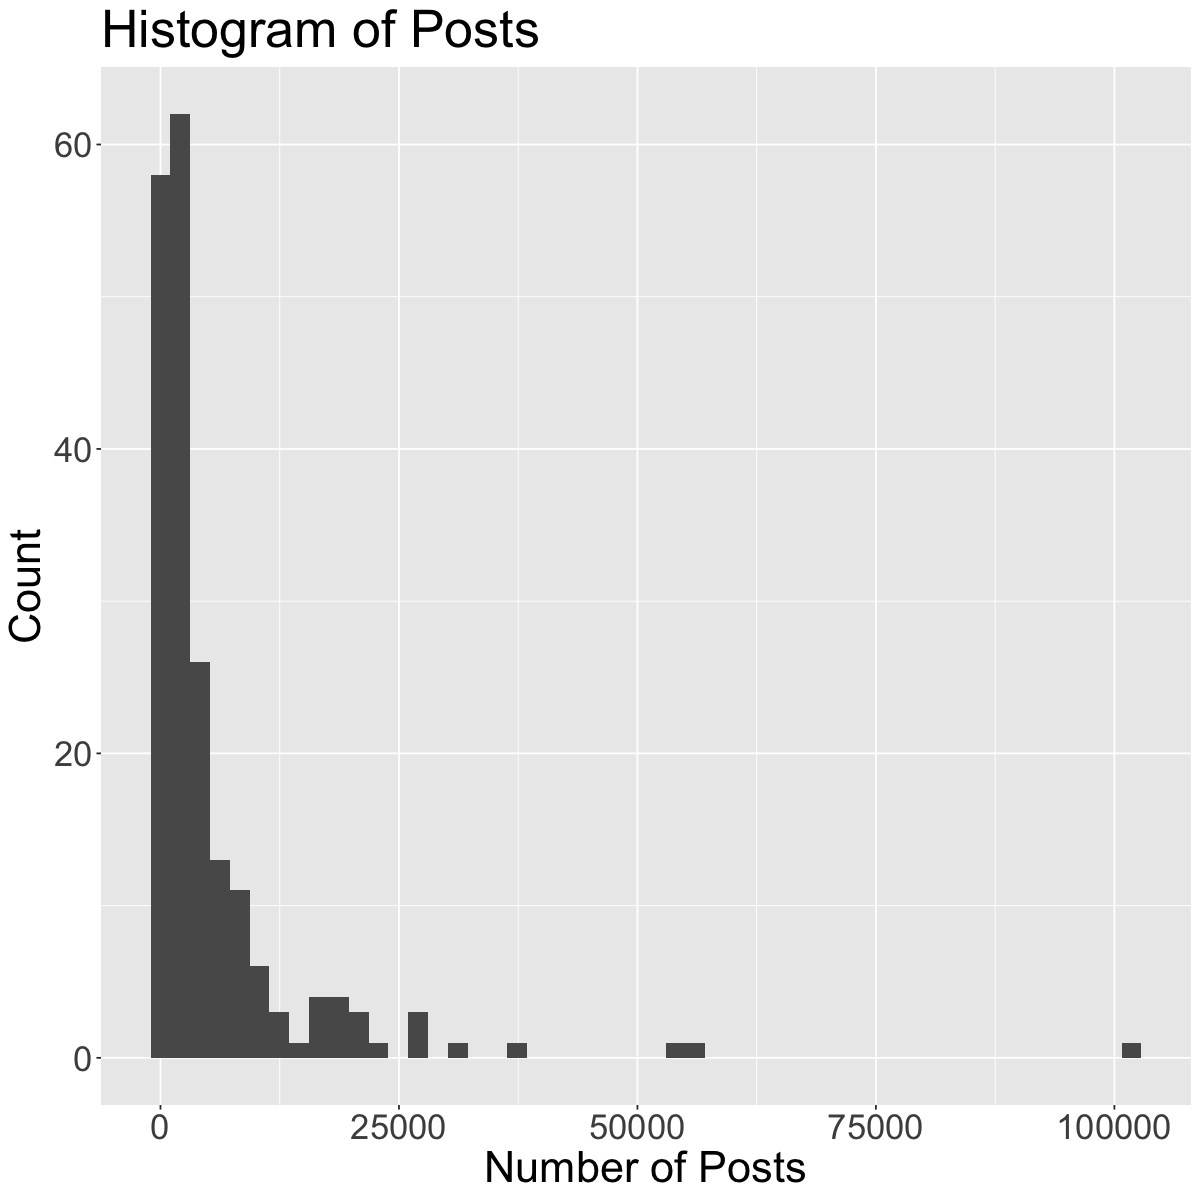

In [142]:
ggplot(insta, aes(x = Posts)) +
    geom_histogram(bins=50) + 
    theme(text = element_text(size = 26)) + # increase text size
    labs(x='Number of Posts', y='Count', title='Histogram of Posts') # rename axes and add title

## 1.2 Center

Graphically, the center of a distribution is where most of the observations are concentrated. When looking at the center of a distribution, we can use the mean or median. 

- The mean is the average of the observations.
- The median is the middle observation (i.e., 50% of data above/below it).

> Note: If the variable is categorical, you can report the mode (most common/frequent observation)

We can extract these values by using the `summarize` function:

In [123]:
insta |> 
    summarize(avg_ER = mean(eng_rate), 
              median_ER = median(eng_rate))

avg_ER,median_ER
<dbl>,<dbl>
2.5525,1.25


## 1.3 Spread

The spread refers to how much variability there is in the data. 

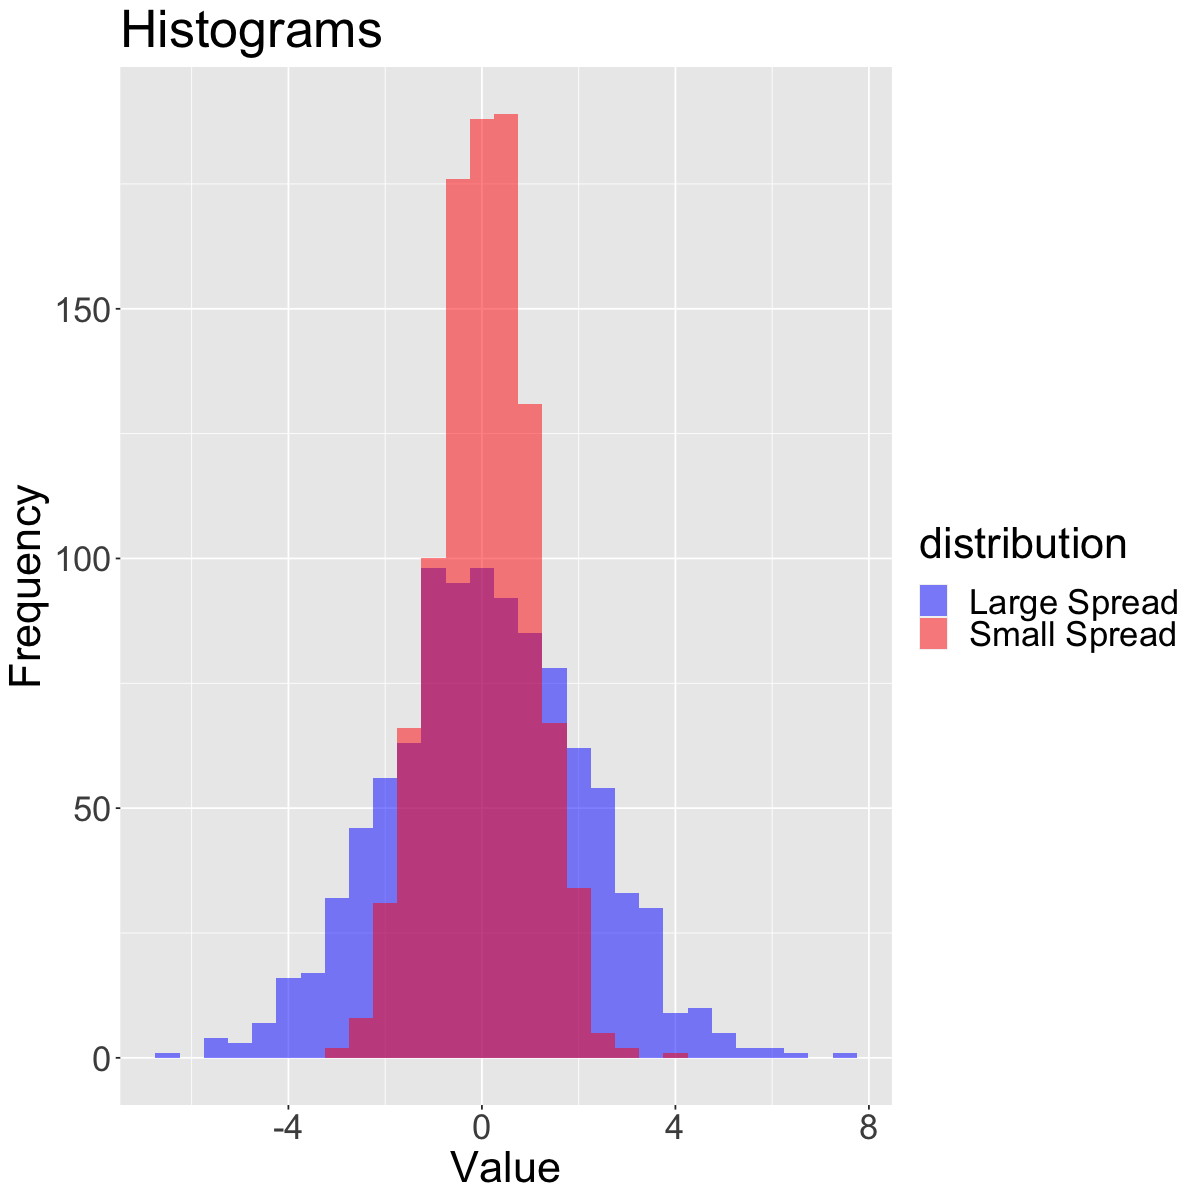

In [140]:
set.seed(930)
data_small <- rnorm(1000, mean = 0, sd = 1)  # Small spread
data_large <- rnorm(1000, mean = 0, sd = 2)  # Large spread

data_tibble <- tibble(
  value = c(data_small, data_large),
  distribution = rep(c("Small Spread", "Large Spread"), each = 1000)
)

# Create histograms with transparency (alpha)
ggplot(data_tibble, aes(x = value, fill = distribution)) +
  geom_histogram(binwidth = 0.5, alpha = 0.5, position = "identity") +
  scale_fill_manual(values = c("blue", "red")) +
  labs(title = "Histograms",
       x = "Value", y = "Frequency") +
  theme(text = element_text(size = 26))


When looking at the spread of a distribution, we can use the standard deviation, interquartile range (IQR) or range (difference between maximum and minimum observation).

Quartiles divide a distribution into four equal parts. The Interquartile Range (IQR) is the distance between the first quartile (Q1) and the third quartile (Q3) (i.e., the middle 50% of the data). The second quartile (Q2) is actually the median!


In [145]:
insta |> 
    summarize(sd_ER = sd(eng_rate), 
              IQR_ER = IQR(eng_rate),
              range_ER = max(eng_rate) - min(eng_rate))

sd_ER,IQR_ER,range_ER
<dbl>,<dbl>,<dbl>
4.196348,1.825,26.5


### Rule of Thumb 

The mean and the standard deviation are typical measures for center and spread. However, they are not resistant to skewness and outliers. A general rule of thumb is:

• If the distribution is roughly symmetric, we use the mean and standard deviation as measures of center and spread.
• If the distribution is skewed or has a lot of outliers, we use the median and IQR as measures of center and spread.

Why? For example, if the data is skewed, the mean gets "pulled" out in the direction of the skewness, whereas the mean is less affected. See the plot below to illustrate this concept:

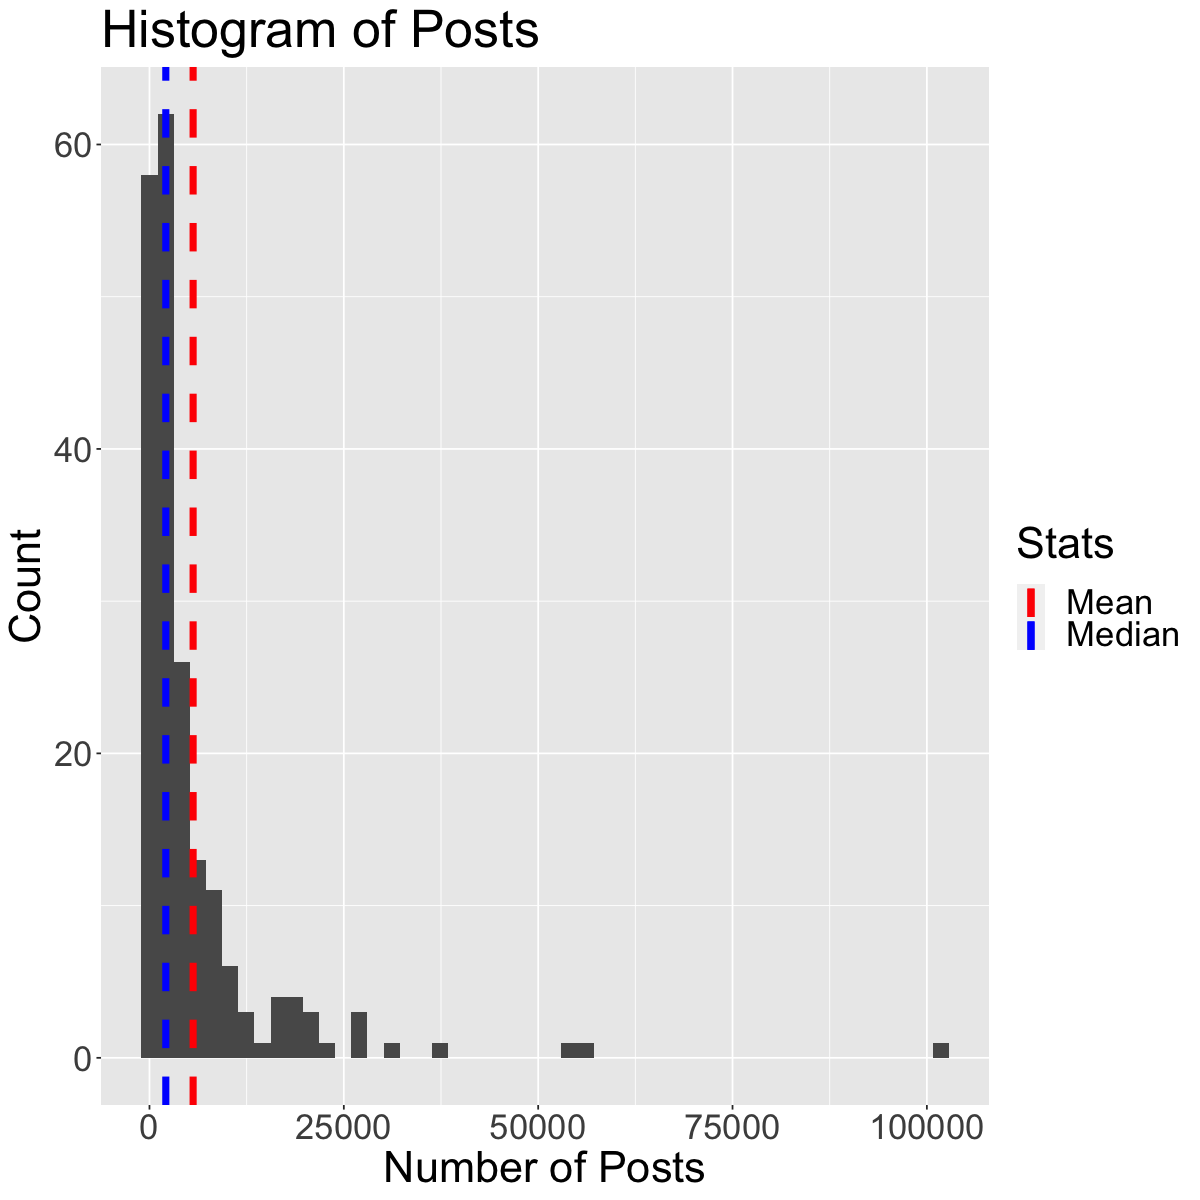

In [161]:
colors <- c("median" = "blue", "mean" = "red")
ggplot(insta, aes(x = Posts)) +
    geom_histogram(bins=50) + 
    theme(text = element_text(size = 26)) + 
    labs(x='Number of Posts', y='Count', title='Histogram of Posts') +
    geom_vline(aes(xintercept=mean(Posts), color="Mean"), 
               linetype="dashed",linewidth=2) +
    geom_vline(aes(xintercept=median(Posts), color="Median"), 
               linetype="dashed",linewidth=2) +
    scale_color_manual(name="Stats",
                       values=c("Mean"="red", "Median"="blue"))

### Exercise 

Question: In what scenarios might the range not be a very appropriate choice for a measure of spread? Why?

# 2. Introduction to Statistical Inference

### What is statistical inference?

Statistical inference is the process of using a *sample* to make conclusions about a wider *population* the sample came from.

**Why?:** It's often expensive or not possible to measure the whole population.

#### E.g.: we want to know the average width of a species of sea star

<img src="img/intro-inf-1.png" width=1100>

<img src="img/intro-inf-2.png" width=1100>

<img src="img/intro-inf-4.png" width=1100>

- **Population:** collection of all possible observations + their frequency/count
    - e.g. the widths of the entire population of sea stars

- **Sample:** a randomly selected subset of observations
    - e.g. I randomly pick 50 sea stars and record their widths

- **Statistic:** something I compute using my sample
    - e.g. the mean width of the sea stars *in my sample*

- **Inference:** using the sample to make a conclusion about the whole population, and *knowing how uncertain you are* about your conclusion

### Examples of inference in the wild: market assessment

What proportion of undergraduate students have an iphone?

<img img align="left" src="https://media.wired.com/photos/5b22c5c4b878a15e9ce80d92/master/w_582,c_limit/iphonex-TA.jpg" width="500"/>

### Examples of inference in the wild: A/B testing

Which of the 2 website designs will lead to more customer engagement (measured by click-through-rate, for example)?

<img img align="left" src="https://images.ctfassets.net/zw48pl1isxmc/4QYN7VubAAgEAGs0EuWguw/165749ef2fa01c1c004b6a167fd27835/ab-testing.png" width="600"/>

## 2.2 Sampling

When we are collecting a sample, we aim for that sample to be representative of the population of interest.

A sample is **biased** if certain individuals in the population have a higher chance of being selected.

### Exercise

In groups, brainstorm a variety of sampling strategies or scenarios that might result in a biased sample. 

### Types of Sampling Bias

There are numerous types of sampling bias, including:

- Response bias: responder gives inaccurate responses for any reason
- Nonresponse bias: person fails to or refuses to respond
- Selection bias: certain people may be more or less likely to be selected (e.g., online survey)
- Volunteer bias: sampling bias can occur when the sample is volunteers (they may have stronger motivations or opinions)
- Recall bias: responder might not accurately recall certain events (e.g., asking someone about something that happened years ago)

### Exercise

For the following scenarios, identify a source of potential sampling bias:

- A telephone survey calls and asks you if you will support a local politician in the upcoming election.

- A survey asks you "when was the last time you visited the dentist?"

- At a store, an optional survey is included on the back of the receipt for you to provide feedback on your shopping experience.

- At work, your boss provides you with a survey which asks you to answer the question "How effective have I been as a manager?"

While there are many different sampling strategies out there, one way to help ensure that a sample is unbiased and representative of the population of interest is by using **random sampling**.

Random sampling is an important consideration when designing a statistical study or research project.

## 2.3 Observational Studies vs. Experiments

Research projects can typically be classified as either **observational studies** or **experiments**.

### Observational Studies

- The researcher observes phenomena without any intervention or controlling any variables. 

- Variables are recorded or measured as the naturally occur. 

- No treatments are imposed by the researcher.

- Researchers can get an idea about the relationships between variables.

### Experiments

- The researcher applies a treatment and manipulates variables.

- Often times, subjects are randomly assigned to treatment and control groups.

- With randomization, researchers can make more definitive causal statements (e.g., variable A caused an increase in variable B). 

### Exercise

Identify the following scenarios as either an observational study or an experiment:

a) Students are randomly assigned into two groups, where in group A they have homework assignments and in group B they do not. Their performance on a final exam is compared to assess the impact of homework on student performance.

b) You investigate the relationship between air pollution in different major cities over the years by analyzing existing records.

c) You are curious about how light and water can impact plant growth, so you investigate the effects of different combinations of light and watering amounts on plant growth. You control for various factors such as weather, temperature and soil conditions.

d) The behaviour of children at recess are studied, and factors such as how they play and socialize are recorded. 



## 2.4 Estimation

A particular inferential problem where we try to *estimate a quantitative property* of the population

This quantitative property is called a **population parameter**

**Question:** What *proportion* (a quantitative population parameter!) of UBC  undergrads have an iphone?
<img align="left" src="img/sampling.001.jpeg" width="700"/>

#### Estimation

Step 1: randomly select a subset (a *sample*) and ask them if they have an iPhone

Step 2: calculate the proportion in our sample (a *statistic* or *point estimate*) and use it as an estimate of the true population proportion.

<img align="left" src="img/sampling.002.jpeg" width="700"/>

### Exercise

In groups, take a "population" of candies from the front of the room. 

- Take a sample of size $n=5$ and record the fraction of red candies you observe.

- Now, repeat the process many times and keep recording the fraction of red candies you observe each time.

- What do you notice about the samples?

The variability from sample to sample is described as **sampling variability**. 

### Virtual simulation experiment

Now, let's simulate this process to see how well sample estimates reflect the true population parameter!

**Question:** What proportion of UBC undergrads have an iPhone?

- Let's create a virtual group of students (our population) where 63% of the students have iPhones
- Then:
    - collect a random sample of 40 students, 
    - calculate a proportion of students with iPhones
   



#### Our virtual UBC students (population)

Let's examine our population of 50,000 students. Remember that the true proportion of iPhone users is 63%.

In [6]:
# load libraries for wrangling and plotting
library(dplyr)
library(infer) 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [11]:
set.seed(1)
virtual_ugrads <- tibble(student_id = seq(1, 50000, by = 1),
                     age = sample(18:25, size=50000, replace=T),
                     phone_type = factor(rbinom(50000, 1, 0.63),
                     labels = c("other", "iphone")))

#### Drawing a single sample of size 40

Let's simulate taking one random sample from our virtual undergrad population. We will use the `rep_sample_n` function from the `infer` package:

In [12]:
student_sample <- rep_sample_n(virtual_ugrads, size = 40)
student_sample

replicate,student_id,age,phone_type
<int>,<dbl>,<int>,<fct>
1,45991,20,iphone
1,36200,19,iphone
1,44639,21,iphone
1,48967,20,iphone
1,33706,20,iphone
1,557,21,iphone
1,43078,25,other
1,3597,21,other
1,25424,19,other


What is the proportion of iPhone users in our sample? Is it close to the population proportion?

In [15]:
iphone_estimate_1 <- summarize(student_sample,
                               count = sum(phone_type == "iphone"),
                               prop = sum(phone_type == "iphone") / 40)
iphone_estimate_1

replicate,count,prop
<int>,<int>,<dbl>
1,25,0.625


What happens if we were to take another sample? Would the sample proportion be the same?

In [21]:
iphone_estimate_2 <- rep_sample_n(virtual_ugrads, size = 40) |> 
    summarize(count = sum(phone_type == "iphone"),
              prop = sum(phone_type == "iphone") / 40)
iphone_estimate_2

replicate,count,prop
<int>,<int>,<dbl>
1,24,0.6


And again?

In [22]:
iphone_estimate_3 <- rep_sample_n(virtual_ugrads, size = 40) |>
    summarize(count = sum(phone_type == "iphone"),
              prop = sum(phone_type == "iphone") / 40)
iphone_estimate_3

replicate,count,prop
<int>,<int>,<dbl>
1,24,0.6


### Sampling distribution

The *distribution* of estimates you get by taking many samples *of a fixed sample size* is called the **sampling distribution**.

How did we do? How reliable is our sample estimate? Should we do anything to change it?

Let's simulate this process $10000$ times to see what happens:

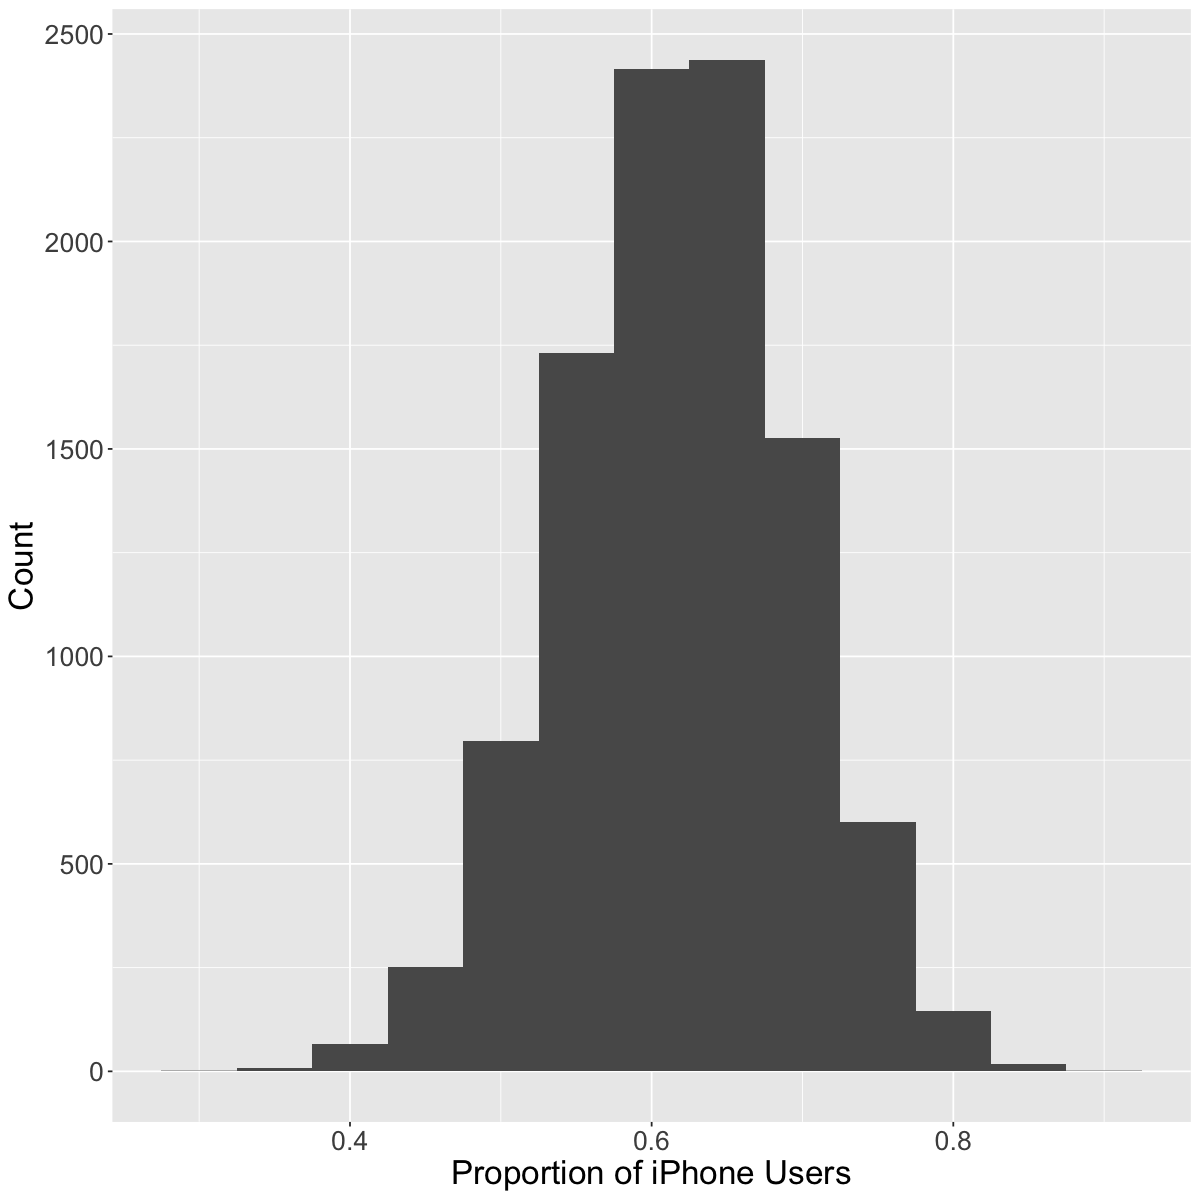

In [170]:
replicates <- rep_sample_n(virtual_ugrads, size = 40, reps = 10000) |>
   group_by(replicate)  |> 
   summarize(proportion = sum(phone_type == "iphone")/40)

ggplot(replicates, aes(x = proportion)) +
    geom_histogram(binwidth = .05) +
    labs(x = "Proportion of iPhone Users", y = "Count") +
    theme(text = element_text(size=20))

Ok, so we noticed that there is variability from sample to sample. But what if we were to increase the sample size from $40$ to $400$? What do we think will happen?

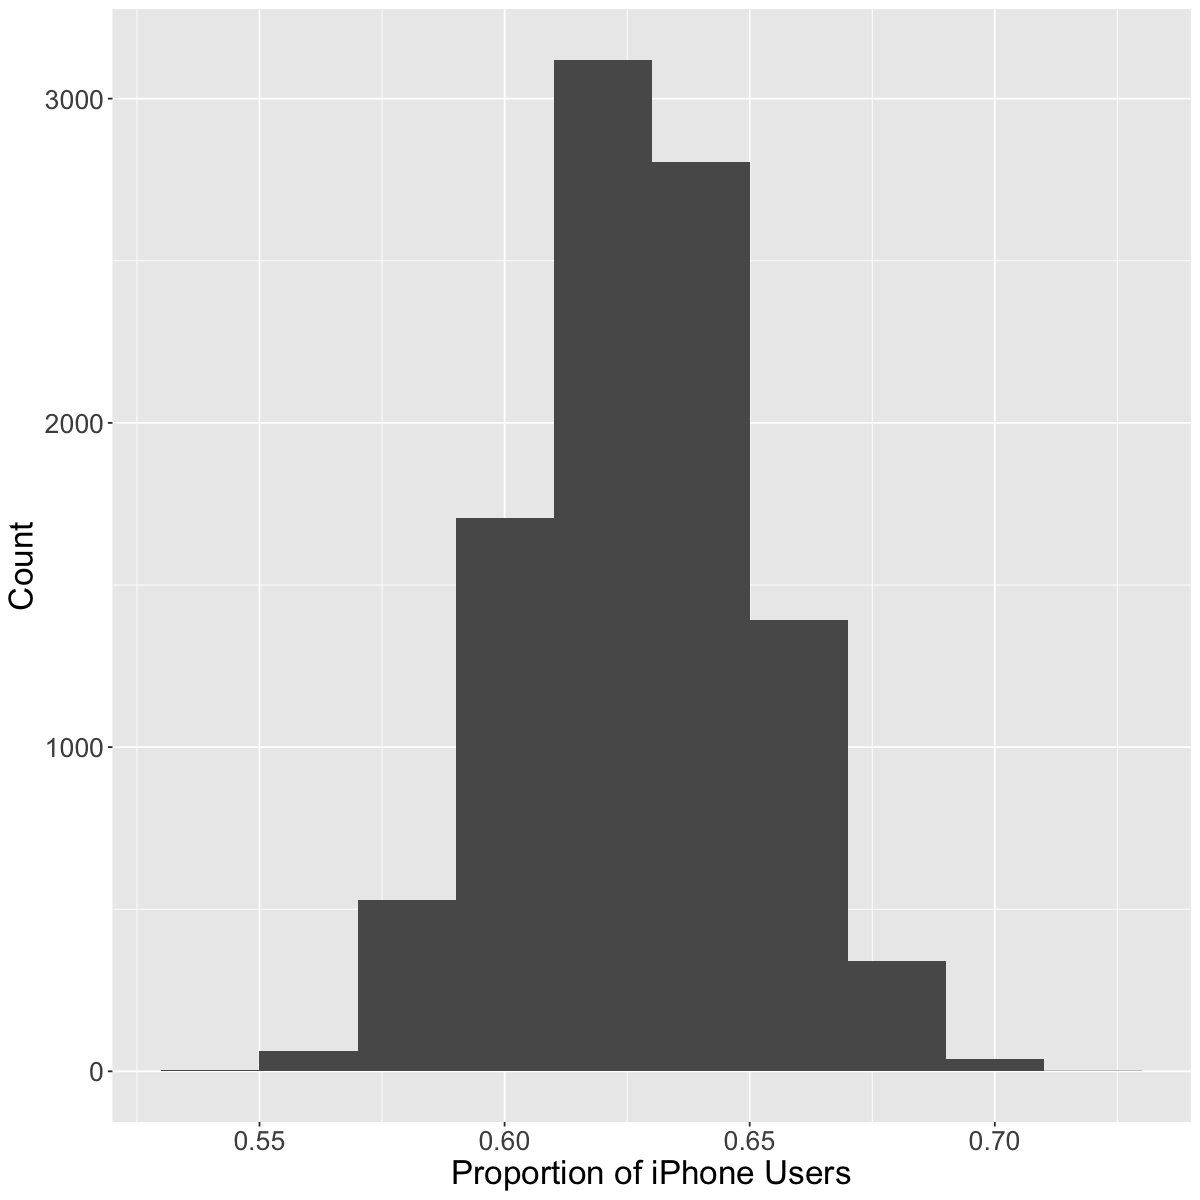

In [171]:
replicates <- rep_sample_n(virtual_ugrads, size = 400, reps = 10000) |>
   group_by(replicate)  |> 
   summarize(proportion = sum(phone_type == "iphone")/400)

ggplot(replicates, aes(x = proportion)) +
    geom_histogram(binwidth = .02) +
    labs(x = "Proportion of iPhone Users", y = "Count") +
    theme(text = element_text(size=20))

To summarize:

- As we have more observations, the sampling variability decreases
- With fewer observations, the sampling variability increases